<a href="https://colab.research.google.com/github/yenlung/Python-3-Data-Analysis-Basics/blob/master/2020%E5%B7%A5%E7%A0%94%E9%99%A2Python%E6%95%B8%E6%93%9A%E5%88%86%E6%9E%90/Colab_NN01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

In [0]:
n = 1234

In [8]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 149,
        255, 129,  37,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 149,
        253, 252, 215,  60,   7,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  53,
        150, 249, 252, 252,  38,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

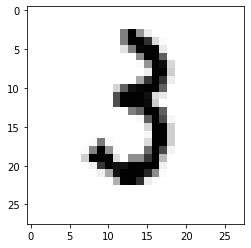

In [10]:
plt.imshow(x_train[n], cmap='Greys')

In [11]:
x_train[n].shape

(28, 28)

In [12]:
y_train[n]

3

In [16]:
np.array([43, 3, 12, 44])/44

array([0.97727273, 0.06818182, 0.27272727, 1.        ])

In [0]:
x_train = x_train.reshape(60000, 784) / 255
x_test = x_test.reshape(10000, 784) / 255

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [20]:
y_train[n]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

3 層
100
100
100

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

### step01. 打造函數學習機

In [0]:
model = Sequential()

In [0]:
model.add(Dense(100, input_dim=784, activation='relu'))

In [0]:
model.add(Dense(100, activation='relu'))

In [0]:
model.add(Dense(100, activation='relu'))

In [0]:
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________________________


### Step01. fit

In [29]:
model.fit(x_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0846 - accuracy: 0.3598
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0578 - accuracy: 0.6267
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0313 - accuracy: 0.8171
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0207 - accuracy: 0.8790
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0172 - accuracy: 0.8943
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0155 - accuracy: 0.9026
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0143 - accuracy: 0.9091
Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0135 - accuracy: 0.9142
Epoch 9/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0128 - accuracy: 0.9187
Epoch 10/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0123 - accuracy: 0.9220

In [0]:
### step03. predict

In [31]:
y_pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [32]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

神經網路預測 1


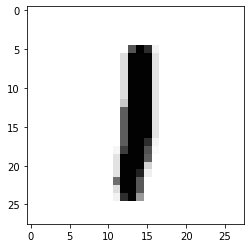

In [34]:
n = 5566

print('神經網路預測', y_pred[n])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')

In [0]:
from google.colab import drive

In [36]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [37]:
%cd '/content/drive/My Drive'

/content/drive/My Drive


In [38]:
%ls

'103學年度第一學期炎龍老師 Office Hours 票選.gform'
'103學年度第一學期炎龍老師 Office Hours 票選 (Responses).gsheet'
 1042MOOC微積分小班.gsheet
 1042微積分名單期中修正.gsheet
 104幾何學筆記/
 1051數學、邏輯與人生.gsheet
'1052 數學軟體應用 Deep Learning'/
 1052數學邏輯與人生期末名單.gsheet
 105索贈清單.xlsx.gsheet
 1061數學、邏輯與人生分班名單09月版.gsheet
 1061線性代數名單.gsheet
 2006機種復習.gdoc
'2009 年政大應用數理資人才培訓回顧與展望.gdoc'
'2018 炎龍老師全家福輸出Jpeg'/
'2019 [M] 資訊第二專長班.gsheet'
'2019 資訊第二專長班.gsheet'
 autoencoder_modified.ipynb
 bird.gsheet
 Boston.gmap
'Colab Notebooks'/
'Copy of User Guide template.gdoc'
'Copy of 空少的咖啡之旅 World Coffee Shops Map.gmap'
'Deep Learning 論文研討清單.gsheet'
 deeptest/
'\documentclass{article}.gdoc'
'Espresso 咖啡機的選擇.gdoc'
 foo.tex.gdoc
 GANs/
'Geogebra Test'
'Google 文件的試用.gdoc'
 Jupyter/
'Keyboard List.gsheet'
 LaTeX/
'Mac OS Unix 系統指令.gdoc'
'Matlab 採購:.gdoc'
'Michigan (1).gmap'
 Michigan.gmap
'Mike Liu 文集.gdoc'
'Moodle 極速入門.gdoc'
 myid.png
'myid - Yen-Lung Tsai.png'
'[NCTS] Python 機器學習與人工智慧入門.gform'
'new design fundamentals.pdf'
'Objective-C 筆記.gdoc'
 PID.gdoc
 

In [0]:
print( )